<a href="https://colab.research.google.com/github/JuanM-GG/Biologia-de-sistemas/blob/main/Chen2012_DOP_11Feb20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Chen model analysis

Nombre: Biología de sistemas

Fecha: febrero 2021

In [ ]:
# instalar librerías
install.packages("deSolve")
install.packages("rootSolve")
install.packages("FME")

In [11]:
# cargar librerías
library(deSolve)
library(rootSolve)
library(FME)

Loading required package: coda



In [12]:
# cargar Grind.R 
source("Grind.R")

grind.R was sourced


Artículo del que se generó la práctica 

Chen, L., Liu, R., Liu, Z. P., Li, M., & Aihara, K. (2012). Detecting earlywarning signals for sudden deterioration of complex diseases by dynamical network
biomarkers. Scientific reports, 2(1), 1-8.

### Descripción del modelo

Tenemos un sistema de cinco variables, $Z_1, Z_2, Z_3, Z_4$ y $Z_5$. No representan un sistema biológico, pero es un buen ejemplo para mostrar como funciona una DNB.  El modelo de ecuaciones diferenciales que describe la dinámica del sistema se puede encontrar en la información suplementaria. El el artículo, ellos encontraron que el sistema presenta una bifurcación detectada por $Z_1$ y $Z_2$ cerca de $P = 0$, donde $P$ es el parámetro de bifurcación 

### Análisis del modelo 

El análisis se hizo usando GrindR. Primero, se transformó el modelo determinista en un modelo estocástico añadiendo ruido aditivo. La función `run()` y la opción `after` permitieron hacer esto facilmente. La magnitud del ruido fue $\sigma = 0.1$ en todos los casos

In [13]:
# Escribir modelo determinista
# Las variables se nombran como sigue: A=z1, B=z2, C=z3, D=z4, E=z5.
model <- function(t,state,parms){
  with(as.list(c(state,parms)),{

    dA = (90*abs(P)-1236) + (240-120*abs(P))/(1+C) + 1488*D/(1+D) - 30*abs(P)*A
    dB = (75*abs(P)-150) + (60-30*abs(P))/(1+A) + ((240-120*abs(P))*C)/(1+C) - 60*B
    dC = -1056 + (1488*D)/(1+D) - 60*C
    dD = -600 + (1350*E)/(1+E) - 100*D
    dE = 108 + 160/(1+A) + 40/(1+B) + 1488/(1+D) -300*E
    
    return(list(c(dA,dB,dC,dD,dE)))
  })
} 

In [14]:
#Establecer parámetro de bifurcación
p <- c(P=0.4) 

In [15]:
# Observar el estado de equilibrio encontrado en el artículo 
low <- newton(state=c(A=0,B=0,C=0,D=2,E=1), parms = p, odes = model, plot=F)
  #SS=(1,0,1,3,2) is the steady state indeed

A B C D E 
1 0 1 3 2 
Stable point, eigenvalues:  -192.7055+31.4173i -192.7055-31.4173i -67.29447+32.04556i -67.29447-32.04556i -12+0i 


#### Modelo determinista usando GrindR

In [ ]:
# condición inicial 
s <- c(A=0,B=0,C=0,D=3,E=2) 

# realizar simulación
run() #Deterministic trajectories

#### Modelo estocástico usando GrindR

Aquí se usa el argumento `after` para crear ruido aditivo. Se emplea la función `rnorm()` para crear un vector aleatorio de longitud 5 a partir de una distribución normal. Se utuliza una media de 0 y una desviación estandar de 0.1

In [53]:
# condición inicial en el estado de equilibrio
s <- c(A=1,B=0,C=1,D=3,E=2) 

# fijar P en la región "normal"
p <- c(P = 0.4) 

# realizar simulación con ruido aditivo
out <- run(tmax=1000, tstep=0.1, after="state<-state+rnorm(5,mean=0,sd=0.1)",
         timeplot = FALSE,table = T)

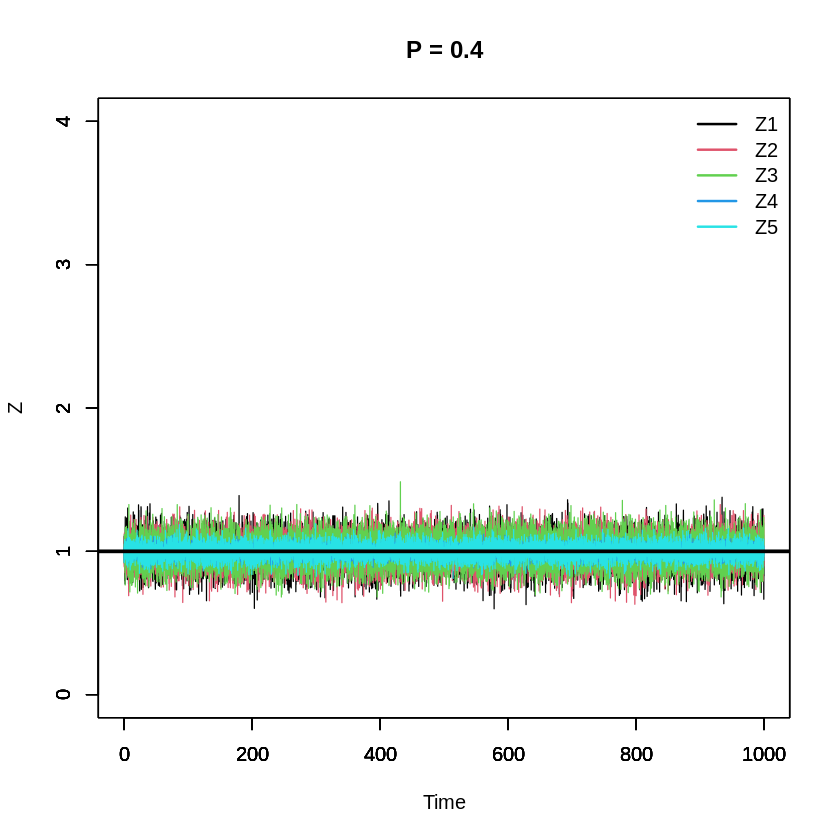

In [54]:
#@title graficar trayectorias
plot(out$time,out$A,type='l',col=1, ylim = c(0,4),
     xlab = "",ylab = "")

par(new=T)
plot(out$time,out$B+1,type='l',col=2, ylim = c(0,4),
     xlab = "",ylab = "")

par(new=T)
plot(out$time,out$C,type='l',col=3,ylim = c(0,4),
     xlab = "",ylab = "")

par(new=T)
plot(out$time,out$D/3,type='l',col=4,ylim = c(0,4),
     xlab = "",ylab = "")

par(new=T)
plot(out$time,out$E/2,type='l',col=5,ylim = c(0,4),
     xlab = "Time",ylab = "Z",main = "P = 0.4")

abline(h = 1, col = "black",lwd=3)

legend("topright", legend=c("Z1", "Z2", "Z3", "Z4", "Z5"),
       col=c(1,2,3,4,5), lty=1,cex = 1, bty = "n", lwd = 2)

Ahora repetir la simulación cerca del valor crítico $P_{crit}$

In [55]:
# fijar P en el estado pre-crítico
p <- c(P=0.01) 

# de nuevo la condición inicial es el estado de equilibrio 
s <- c(A=1,B=0,C=1,D=3,E=2)

In [56]:
# realizar simulación 
outNearBif <- run(tmax=1000, tstep=0.1, after="state<-state+rnorm(5,mean=0,sd=0.1)",timeplot=FALSE,table = T)

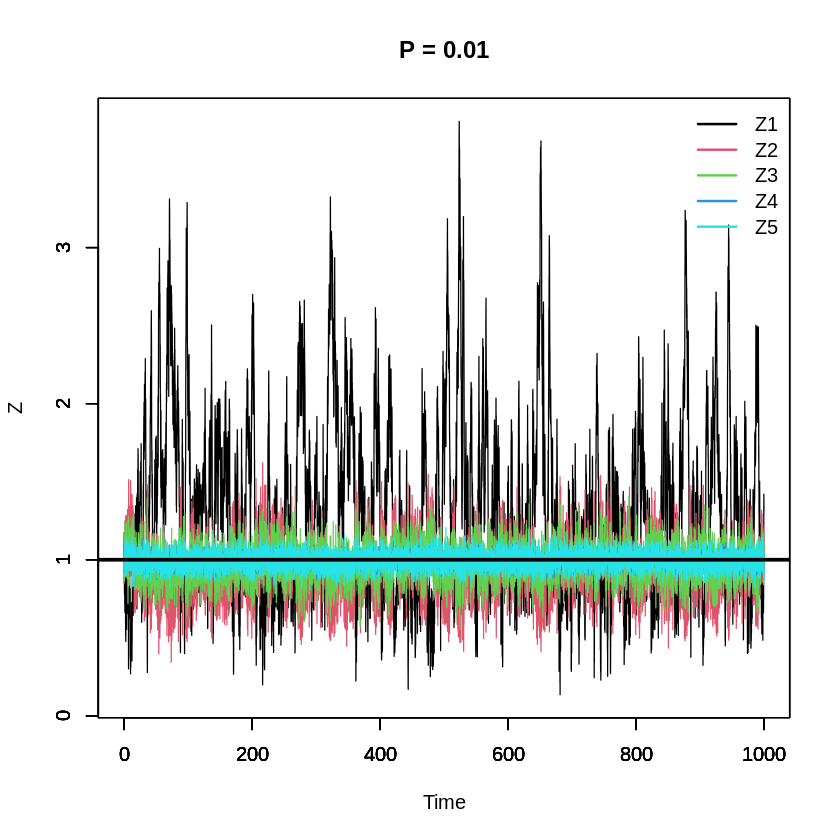

In [57]:
#@title graficar trayectorias
plot(outNearBif$time,outNearBif$A,type='l',col=1,ylim = c(min(outNearBif$A),max(outNearBif$A)),
    xlab = "",ylab = "")
par(new=T)
plot(outNearBif$time,outNearBif$B+1,type='l',col=2,ylim = c(min(outNearBif$A),
    max(outNearBif$A)),xlab = "",ylab = "")
par(new=T)
plot(outNearBif$time,outNearBif$C,type='l',col=3,ylim = c(min(outNearBif$A),max(outNearBif$A)),
    xlab = "",ylab = "")
par(new=T)
plot(outNearBif$time,outNearBif$D/3,type='l',col=4,ylim = c(min(outNearBif$A),max(outNearBif$A)),
    xlab = "",ylab = "")
par(new=T)
plot(outNearBif$time,outNearBif$E/2,type='l',col=5,ylim = c(min(outNearBif$A),max(outNearBif$A)),
    xlab = "Time",ylab = "Z",
     main = "P = 0.01")
abline(h = 1, col = "black",lwd=3)
legend("topright", legend=c("Z1", "Z2", "Z3", "Z4", "Z5"),
       col=c(1,2,3,4,5), lty=1,cex=1, lwd = 2, bty = "n")

### Señales de alerta temprana 

nota: Se comienza en la misma condición inicial 

In [32]:
print(s)

A B C D E 
1 0 1 3 2 


In [60]:
# valores del parámetro P que se estudiarán 
parameters <- seq(0.4, 0, by = -0.01)

# número de variables 
variables = 5

In [61]:
# matriz para guardad las desviaciones estándar 
auxSD <- matrix(0, length(parameters), variables + 1)

# matriz para guardar los coeficinetes de correlación (5 combinación 2 = 10 (coeficiente binomial))
auxCOR <- matrix(0, length(parameters), 10)

# matriz para guardar SDd, PCCd, PCCo y el índice compuesto
auxMarkers <- matrix(0, length(parameters), 4)

#auxComIndex <- matrix(0,length(Parameters),1)

In [ ]:
#@title ciclo for para realizar simulación variando el valor del parámetro P y calcular
# desviación estandar de cada variable de estado sobre el intervalo de simulación,
# el coeficiente de correlación y los marcadores
cont <- 1
for (i in 1:length(parameters)) {

    # modificar valor de parámetro P para la simulación
    p <- c(P = parameters[i])

    # realizar simulación con valor actual de P
    outSD <- run(tmax = 5000, tstep = 0.1, after = "state <- state+rnorm(5,mean=0,sd=0.1)",
             timeplot = FALSE, table = T)

    # calcular desviación estándar
    dev <- apply(outSD, 2, sd) # 2 para calcular sd sobre las columnas

    # guardar la desviación estandar de cada  variable obtenida con el valor actual
    # del parámetro P
    for (j in 1:variables) {

        auxSD[i,j] <- dev[j]
    }

    # calcular los coeficientes de correlación de Pearson
    corAB<-cor(outSD$A,outSD$B); corCD<-cor(outSD$C,outSD$D)
    corAC<-cor(outSD$A,outSD$C); corCE<-cor(outSD$C,outSD$E)
    corAD<-cor(outSD$A,outSD$D); corDE<-cor(outSD$D,outSD$E)
    corAE<-cor(outSD$A,outSD$E); corBD<-cor(outSD$B,outSD$D)
    corBC<-cor(outSD$B,outSD$C); corBE<-cor(outSD$B,outSD$E)

    #  guardar los coeficientes de correlación de Pearson 
    auxCOR[i,cont] <- corAB
    auxCOR[i,cont+1] <- corAC
    auxCOR[i,cont+2] <- corAD
    auxCOR[i,cont+3] <- corAE
    auxCOR[i,cont+4] <- corBC
    auxCOR[i,cont+5] <- corBD
    auxCOR[i,cont+6] <- corBE
    auxCOR[i,cont+7] <- corCE
    auxCOR[i,cont+8] <- corCD
    auxCOR[i,cont+9] <- corDE

    # calcular índice compuesto
    SDd <- mean(c(auxSD[i,2], auxSD[i,3])) # Este debería incrementar
    PCCd <- abs(mean(c(corAB))) # Este debería incrementar
    PCCo <- abs(mean(c(corAC, corAD, corAE, corBC, corBD, corBE))) # Este debería disminuir
    CompIndex <- (SDd*PCCd)/(PCCo)

    # guardar índice compuesto 
    auxMarkers[i,1] <- SDd
    auxMarkers[i,2] <- PCCd
    auxMarkers[i,3] <- PCCo
    auxMarkers[i,4] <- CompIndex
}

In [63]:
# escribir la información recolectada 
write.csv(auxSD,"SD_Chen2012_12Feb20.csv")
write.csv(auxCOR,"PCC_Chen2012_12Feb20.csv")
write.csv(auxMarkers,"CompIndex_Chen2012__12Feb20.csv")

In [64]:
# leer la información recolectada
SD <- read.csv("SD_Chen2012_12Feb20.csv",sep = ",")
PCC <- read.csv("PCC_Chen2012_12Feb20.csv",sep = ",")
CompIndex <- read.csv("CompIndex_Chen2012__12Feb20.csv",sep = ",")

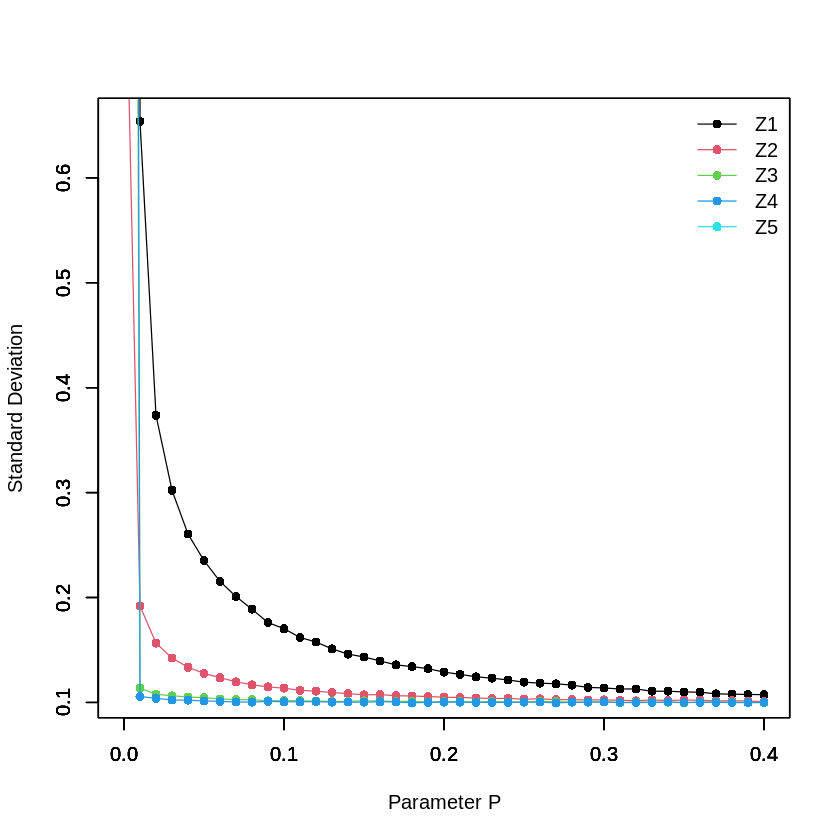

In [65]:
#@title mostrar desviación estándar 
plot(parameters,SD$V2,type="o",pch=16,col=1,ylim = c(min(SD$V2[1:40]),max(SD$V2[1:40])),xlab = "",ylab = "")
par(new=T)
plot(parameters,SD$V3,type="o",pch=16,col=2,ylim = c(min(SD$V2[1:40]),max(SD$V2[1:40])),xlab = "",ylab = "")
par(new=T)
plot(parameters,SD$V4,type="o",pch=16,col=3,ylim = c(min(SD$V2[1:40]),max(SD$V2[1:40])),xlab = "",ylab = "")
par(new=T)
plot(parameters,SD$V5,type="o",pch=16,col=4,ylim = c(min(SD$V2[1:40]),max(SD$V2[1:40])),xlab = "",ylab = "")
par(new=T)
plot(parameters,SD$V6,type="o",pch=16,col=4,ylim = c(min(SD$V2[1:40]),max(SD$V2[1:40])),xlab = "Parameter P",ylab = "Standard Deviation")
legend("topright", legend = c("Z1", "Z2", "Z3", "Z4","Z5"),
       col=c(1,2,3,4,5), pch = 16, lty = 1,cex = 1, bty = "n")

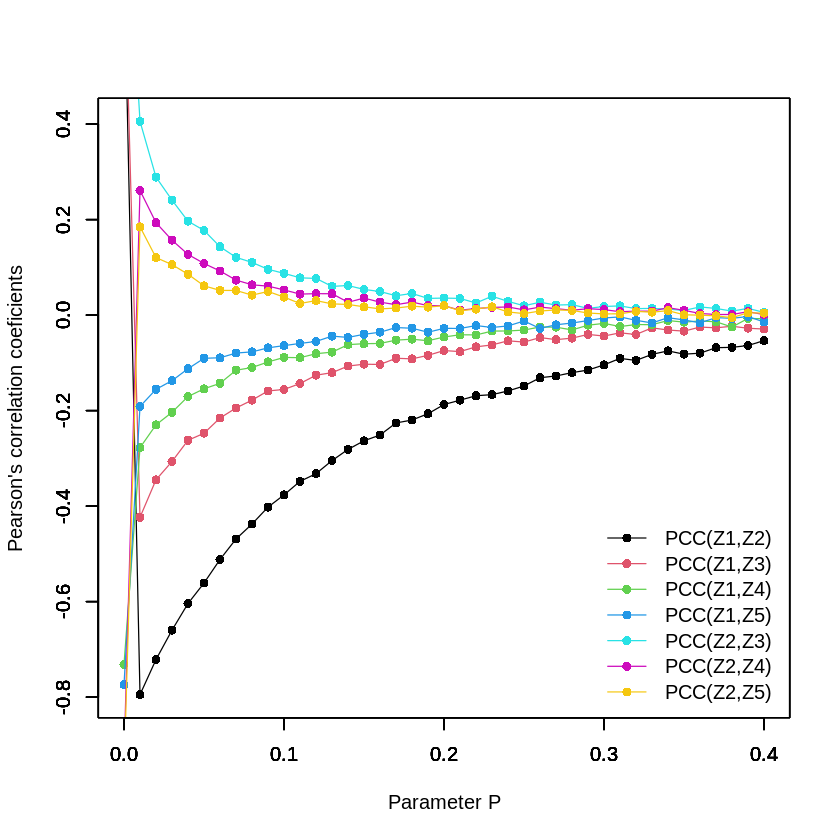

In [71]:
#@title mostrar coeficiente de correlación

plot(parameters,(PCC$V1),type="o",pch=16,col=1,ylim = c(min((PCC$V1[1:40])),max((PCC$V5[1:40]))),xlab = "",ylab = "")
par(new=T)
plot(parameters,(PCC$V2),type="o",pch=16,col=2,ylim = c(min((PCC$V1[1:40])),max((PCC$V5[1:40]))),xlab = "",ylab = "")
par(new=T)
plot(parameters,(PCC$V3),type="o",pch=16,col=3,ylim = c(min((PCC$V1[1:40])),max((PCC$V5[1:40]))),xlab = "",ylab = "")
par(new=T)
plot(parameters,(PCC$V4),type="o",pch=16,col=4,ylim = c(min((PCC$V1[1:40])),max((PCC$V5[1:40]))),xlab = "",ylab = "")
par(new=T)
plot(parameters,(PCC$V5),type="o",pch=16,col=5,ylim = c(min((PCC$V1[1:40])),max((PCC$V5[1:40]))),xlab = "",ylab = "")
par(new=T)
plot(parameters,(PCC$V6),type="o",pch=16,col=6,ylim = c(min((PCC$V1[1:40])),max((PCC$V5[1:40]))),xlab = "",ylab = "")
par(new=T)
plot(parameters,(PCC$V7),type="o",pch=16,col=7,ylim = c(min((PCC$V1[1:40])),max((PCC$V5[1:40]))),xlab = "Parameter P",ylab = "Pearson's correlation coeficients")
# par(new=T)
# plot(parameters,abs(PCC$V8),type="o",pch=16,col=8,ylim = c(0,max(abs(PCC$V1[1:38]))),xlab = "",ylab = "")
# par(new=T)
# plot(parameters,abs(PCC$V9),type="o",pch=16,col=9,ylim = c(0,max(abs(PCC$V1[1:38]))),xlab = "",ylab = "")
# par(new=T)
# plot(parameters,abs(PCC$V10),type="o",pch=16,col=10,ylim = c(0,max(abs(PCC$V1[1:38]))),xlab = "Parameters P",ylab = "Pearson's correlation coeficients")
legend("bottomright", legend=c("PCC(Z1,Z2)", "PCC(Z1,Z3)", "PCC(Z1,Z4)", "PCC(Z1,Z5)",
                         "PCC(Z2,Z3)","PCC(Z2,Z4)","PCC(Z2,Z5)"),
                         col=c(1,2,3,4,5,6,7), pch = 16, lty=1,cex=1, bty = "n")

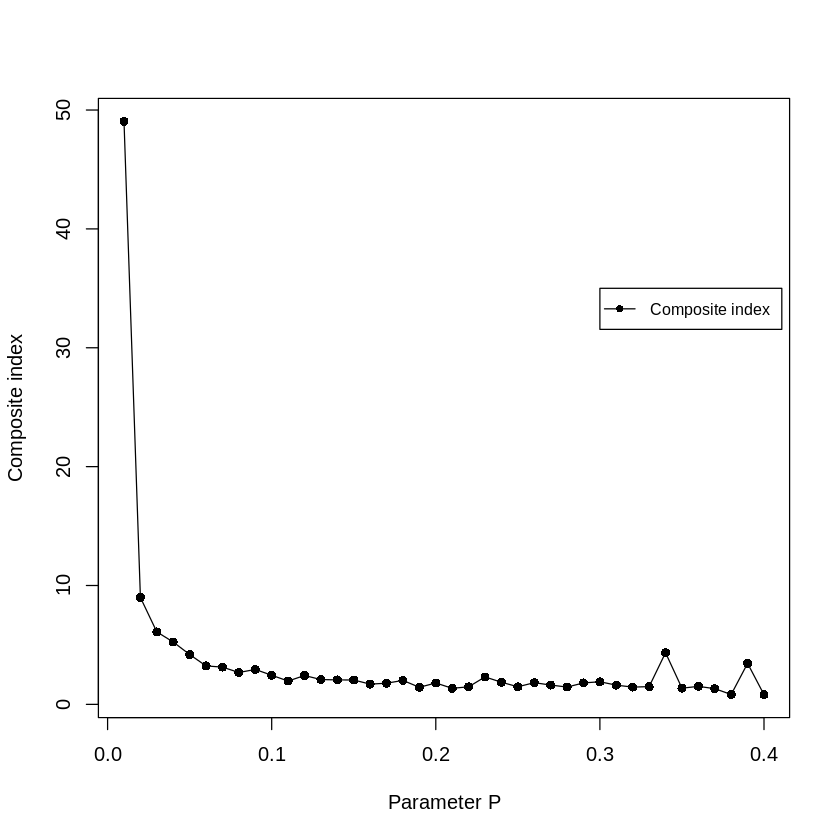

In [67]:
# graficar índice compuesto 
plot(parameters[1:40],CompIndex$V4[1:40],type="o",pch=16,col=1,xlab = "Parameter P",ylab = "Composite index")
legend(.3,35, legend=c("Composite index"),cex=0.8,pch=16,lty=1)

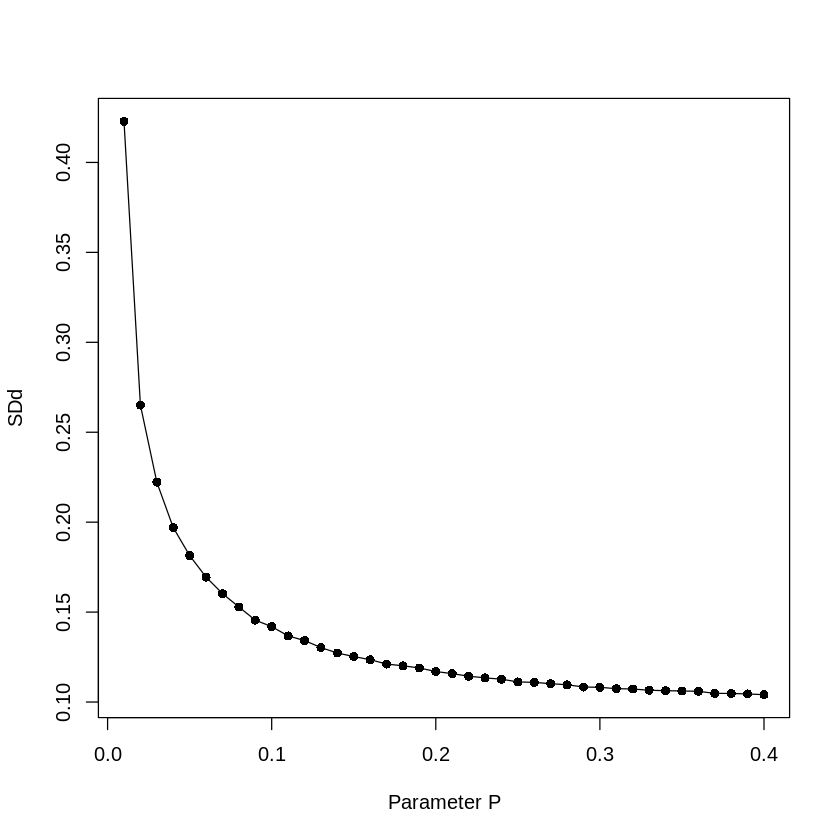

In [68]:
#SDd
plot(parameters[1:40],CompIndex$V1[1:40],type="o",pch=16,col=1,xlab = "Parameter P",ylab = "SDd")                   

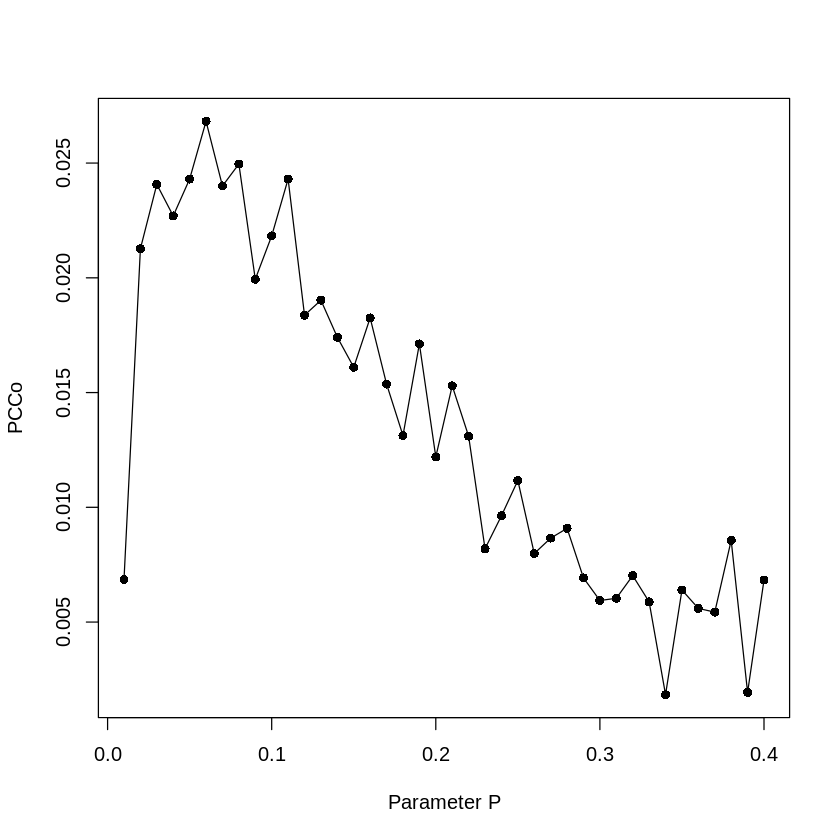

In [69]:
#PCCo
plot(parameters[1:40],CompIndex$V3[1:40],type="o",pch=16,col=1,xlab = "Parameter P",ylab = "PCCo")

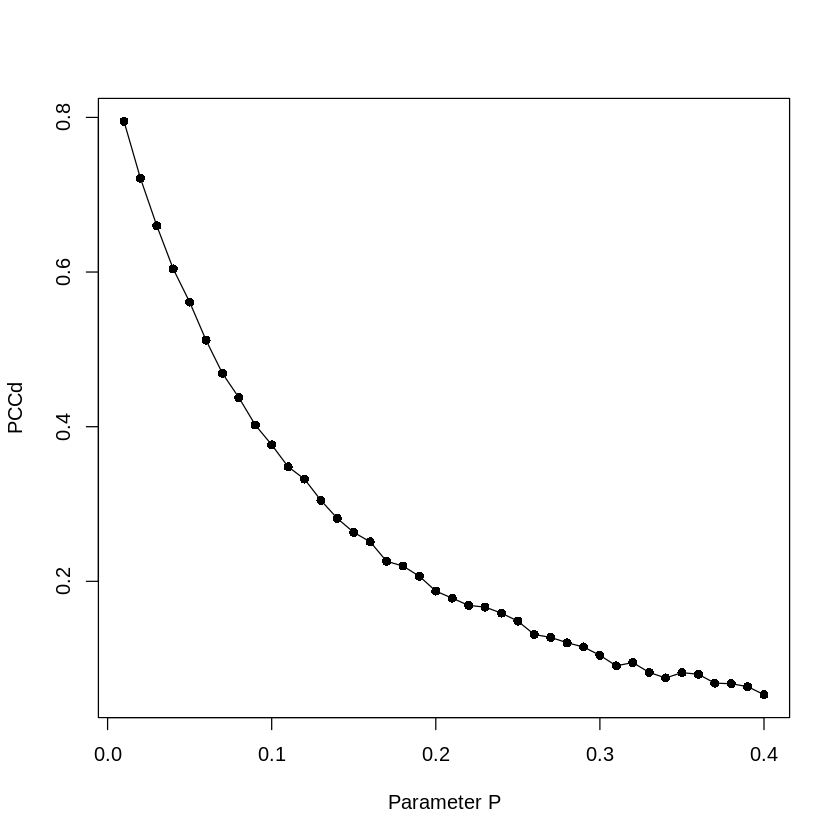

In [70]:
#PCCd
plot(parameters[1:40],CompIndex$V2[1:40],type="o",pch=16,col=1,xlab = "Parameter P",ylab = "PCCd")